In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nrp7.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,55,Private,199067,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,29,Private,247445,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
2,49,Private,186078,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
3,31,Private,77634,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,42,United-States,<=50K
4,24,Private,180060,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [10]:
data = data.replace(' ?', np.nan)

In [12]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    296 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
data['age'] = StandardScaler().fit(data[['age']]).transform(data[['age']])
data['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data.head()

C:\Users\suwarno\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\suwarno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\suwarno\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\suwarno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\suwarno\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  r

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,1.152981,Private,0.051307,HS-grad,-0.468536,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.122954,-0.201917,-0.117739,United-States,>50K
1,-0.739538,Private,0.518854,HS-grad,-0.468536,Divorced,Sales,Not-in-family,White,Male,-0.122954,-0.201917,0.276476,United-States,<=50K
2,0.716245,Private,-0.074224,Masters,1.456955,Married-civ-spouse,Prof-specialty,Wife,White,Female,-0.122954,-0.201917,0.670690,United-States,>50K
3,-0.593960,Private,-1.122276,Assoc-voc,0.301660,Married-civ-spouse,Other-service,Husband,White,Male,-0.122954,-0.201917,0.039947,United-States,<=50K
4,-1.103484,Private,-0.132385,Masters,1.456955,Never-married,Exec-managerial,Own-child,White,Male,1.004371,-0.201917,3.824406,United-States,<=50K


In [32]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [33]:
print(data_Y['type'].unique())

[' >50K' ' <=50K']


In [34]:
data_int_array = []
data_float_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [35]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [36]:
data_num_w_class = pd.concat([data_int_clean, data_Y], axis=1)

In [37]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

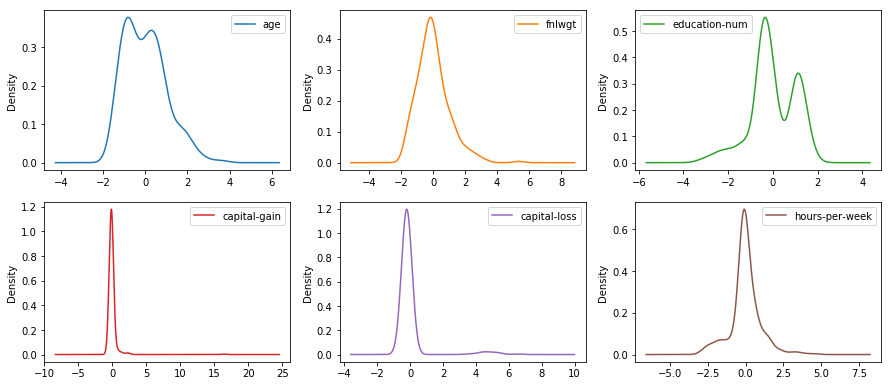

In [38]:
data_num_w_class.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

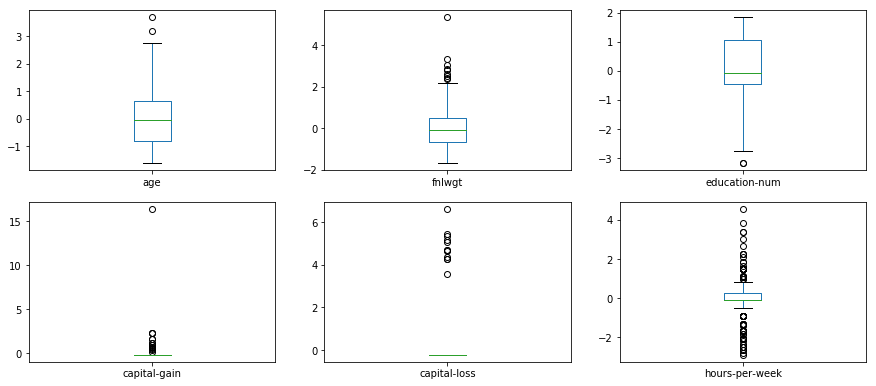

In [39]:
data_num_w_class.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [40]:
colors_palette = {" >50K": "red",  " <=50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_class['type']]  

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_class, color=colors, diagonal='kde')
plt.show()

In [ ]:
data_cleaned = pd.concat([data_num_w_class, data_cat_clean], axis=1)

In [ ]:
data_cleaned.to_csv('nrp7.csv', index=0)